## Ej2
Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.

La capacidad de un perceptron está definida en la p.111 del libro "Introduction to the theory of neural computation". El experimento se debe hacer para para una cantidad particular de unidades de entrada, que sería la dimensión de nuestro espacio de features. A medida que este número N aumenta ($N \to \inf$), se demuestra que la capacidad de almacenamiento máxima del perceptron converge a $p_{max} = 2N$, con $p$ la cantidad de patrones. 

La idea es tomar un perceptron de cierto tamaño y alimentarlo con cada vez más patrones, y posiblemente hacerlo varias veces y promediar los resultados. 

Esto reemplaza un poco el laburo del archivo "ej1y2", porque no andaba bien. Usé reformuleo del código original con una IA para resolver los problemas que no logré ver en su momento

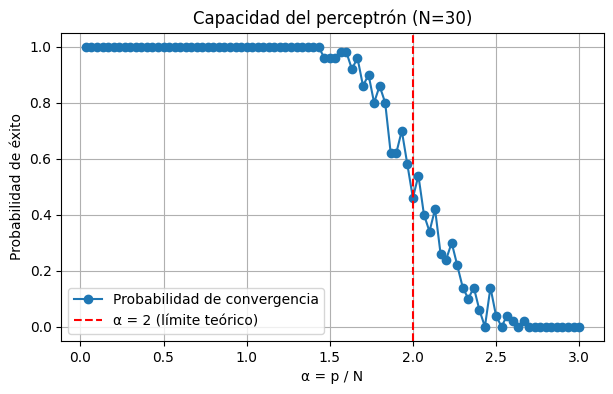

In [7]:
import numpy as np
import matplotlib.pyplot as plt


class PerceptronSimple:
    def __init__(self):
        self.w = None
        self.convergencia = False

    def predict(self, X):
        return np.sign(np.dot(X, self.w))

    def train(self, X, y, epochs=100, lr=0.1):
        """
        Entrena el perceptrón hasta converger o alcanzar el máximo de épocas.
        X debe incluir una columna de 1s para el bias.
        """
        n_muestras, n_features = X.shape
        self.w = np.random.uniform(-1, 1, size=n_features)

        for _ in range(epochs):
            errores = 0
            for xi, target in zip(X, y):
                pred = np.sign(np.dot(xi, self.w))
                if pred == 0:  # si justo da 0, tratamos como error
                    pred = -1
                if pred != target:
                    self.w += lr * target * xi
                    errores += 1
            if errores == 0:
                self.convergencia = True
                break


class EvaluarCapacidad:
    def __init__(self, N):
        """
        N: dimensión de entrada
        """
        self.N = N
        self.resultados = {}

    def generar_patrones(self, p):
        """
        Genera p patrones aleatorios en R^N con etiquetas ±1.
        """
        X = np.random.uniform(-1, 1, size=(p, self.N))
        X = np.hstack([np.ones((p, 1)), X])  # agrega bias
        y = np.random.choice([-1, 1], size=p)
        return X, y

    def test(self, cantidad=None, repeticiones=20, epochs=100, lr=0.1, seed=0):
        """
        Evalúa probabilidad de convergencia para distintos valores de p.
        """
        np.random.seed(seed)
        if cantidad is None:
            cantidad = 3 * self.N  # va hasta 3N

        self.resultados = {}

        for p in range(1, cantidad + 1):
            exitos = 0
            for _ in range(repeticiones):
                X, y = self.generar_patrones(p)
                modelo = PerceptronSimple()
                modelo.train(X, y, epochs=epochs, lr=lr)
                if modelo.convergencia:
                    exitos += 1
            self.resultados[p] = exitos / repeticiones

        return self.resultados


# ---------- Ejemplo de uso ----------
if __name__ == "__main__":
    N = 30
    tester = EvaluarCapacidad(N)
    resultados = tester.test(repeticiones=50, epochs=1000, lr=0.01)

    ps = np.array(list(resultados.keys()))
    probs = np.array(list(resultados.values()))

    plt.figure(figsize=(7, 4))
    plt.plot(ps / N, probs, 'o-', label="Probabilidad de convergencia")
    plt.axvline(2, color='r', linestyle='--', label='α = 2 (límite teórico)')
    plt.xlabel("α = p / N")
    plt.ylabel("Probabilidad de éxito")
    plt.title(f"Capacidad del perceptrón (N={N})")
    plt.legend()
    plt.grid(True)
    plt.show()


El código genera conjuntos de patrones aleatorios y entrena un \textit{perceptrón simple} para clasificarlos. 
Repite el experimento múltiples veces y calcula con qué frecuencia el perceptrón logra aprender sin errores (es decir, converge). 
Luego grafica la \textbf{probabilidad de éxito} en función de la razón $\alpha = \frac{p}{N}$, 
donde $p$ es la cantidad de patrones y $N$ la dimensión de entrada, 
mostrando así la \textbf{capacidad de almacenamiento} del perceptrón.
